In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [18]:
S3=(lambda x1,x2,x3,x4: x1**2 + x2**2 + x3**2 + x4**2 - 1 )

In [82]:
def GetVectorF(G,r):
    v = (G(r[0],r[1],r[2],r[3]))
    return np.array([v])

In [54]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return np.linalg.norm(v)

In [59]:
def GetJacobian(G,r,h=1e-6):
    
    dim = 4
    
    J = np.zeros((1,dim))
    J[0,0] = (  G(r[0]+h,r[1],r[2],r[3]) - G(r[0]-h,r[1],r[2],r[3]) )/(2*h)
    J[0,1] = (  G(r[0],r[1]+h,r[2],r[3]) - G(r[0],r[1]-h,r[2],r[3]) )/(2*h)
    J[0,2] = (  G(r[0],r[1],r[2]+h,r[3]) - G(r[0],r[1],r[2]-h,r[3]) )/(2*h)
    J[0,3] = (  G(r[0],r[1],r[2],r[3]+h) - G(r[0],r[1],r[2],r[3]-h) )/(2*h)
    return J.T

In [60]:
def RandomVector():
    r=np.random.uniform(-1,1,4)
    return r


In [61]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorF(G,r)
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        
        NewF = GetMetric(G,r)
        
        Vector_F = np.append(Vector_F,NewF)
        
        d = np.abs( CurrentF - NewF )/NewF
        
        it += 1
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r

In [83]:
n=int(1e3)
dim=4
array=np.zeros((n,dim))
for i in tqdm(range(n)):
    xsol=GetSolve(S3,RandomVector())
    array[i,0] = xsol[0]
    array[i,1] = xsol[1]
    array[i,2] = xsol[2]
    array[i,3] = xsol[3]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:32<00:00,  3.68it/s]


In [84]:
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))

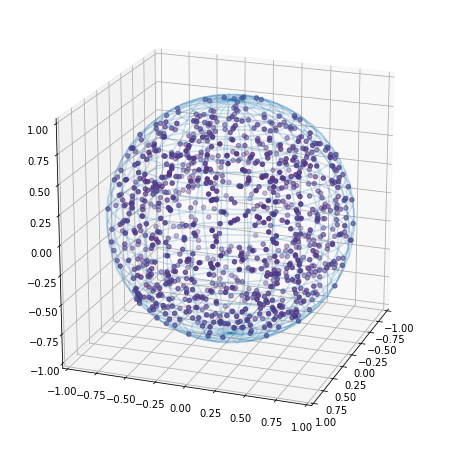

In [85]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.set_box_aspect([1,1,1])

ax.plot_wireframe(x, y, z,alpha=0.2)

ax.view_init(20, 20)
ax.scatter(array[:,0],array[:,1],array[:,2],color='#533483')
plt.show()